# Taller 3
Presentado por
### Victor Manuel Dávila
### Oscar Javier Restrepo
### Daniel Lozano Barrero

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Adelgazamiento

In [37]:
img = cv2.imread('taller3img/test.png')

height, width, channels = img.shape

def hitOrMiss(A, B):
    B1 = np.copy(B)
    B2 = np.copy(B)

    for i in range(len(B1)):
        for j in range(len(B1[0])):
            if B1[i][j] == 'x': B1[i][j] = 0

    for i in range(len(B2)):
        for j in range(len(B2[0])):
            if B2[i][j] == 'x' or B2[i][j] == '1': B2[i][j] = 0
            elif B2[i][j] == '0': B2[i][j] = 1

    A_c = cv2.bitwise_not(A)
    HM1 = cv2.erode(A, B1, 1)
    HM2 = cv2.erode(A_c, B2, 1)
    HM = cv2.bitwise_and(HM1, HM2)

    return HM

def thinning(A):
    B = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5), (0, 0))
    HM = hitOrMiss(A, B)
    thinned = A - HM
    return thinned

thinned = thinning(img)

cv2.imshow('Original', img)
cv2.waitKey()
cv2.imshow('Adelgazada', thinned)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Esqueleto

In [38]:
img = cv2.imread('taller3img/test.png')

def getSk(A, B, k):
    Sk0 = cv2.erode(A, B, iterations = k)
    Sk = Sk0 - cv2.morphologyEx(Sk0, cv2.MORPH_OPEN, B)
    return Sk

def getSkeleton(A):
    B = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5), (0, 0))

    Sk = None
    skeleton = np.zeros_like(A)
    K = 10
    for k in range(1, K):
        Sk = getSk(A, B, k)
        skeleton = cv2.bitwise_or(skeleton, Sk)

    return skeleton

skeleton = getSkeleton(img)

cv2.imshow('Skeleton', skeleton)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Erosión
Se hacen las pruebas con diferentes iteraciones y kernel. Se utiliza una imagen diferente a las empleadas en el proyecto por la facilidad de evidenciar los efectos de las operaciones morfológicas

(<Axes: title={'center': '50 iteraciones'}>,
 Text(0.5, 1.0, '50 iteraciones'))

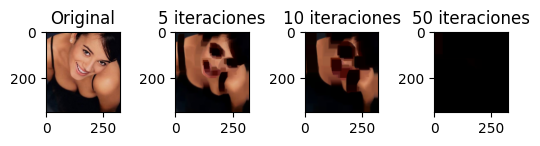

In [39]:
#interior = cv2.imread('interior.jpg')
interior = cv2.imread('taller3img/test.png')
interiorRGB= cv2.cvtColor(interior, cv2.COLOR_BGR2RGB)
kernel=np.ones((5,5),np.uint8)
erosion1=cv2.erode(interiorRGB,kernel,iterations=5)
erosion2=cv2.erode(interiorRGB,kernel,iterations=10)
erosion3=cv2.erode(interiorRGB,kernel,iterations=50)

plt.subplot(441), plt.imshow(interiorRGB), plt.title('Original')
plt.subplot(442), plt.imshow(erosion1), plt.title('5 iteraciones')
plt.subplot(443), plt.imshow(erosion2), plt.title('10 iteraciones')
plt.subplot(444), plt.imshow(erosion3), plt.title('50 iteraciones')


Aplicamos un kernel Elipse

(<Axes: title={'center': '50 iteraciones'}>,
 Text(0.5, 1.0, '50 iteraciones'))

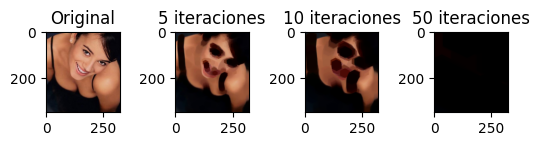

In [29]:
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
erosion1=cv2.erode(interiorRGB,kernel,iterations=5)
erosion2=cv2.erode(interiorRGB,kernel,iterations=10)
erosion3=cv2.erode(interiorRGB,kernel,iterations=50)

plt.subplot(441), plt.imshow(interiorRGB), plt.title('Original')
plt.subplot(442), plt.imshow(erosion1), plt.title('5 iteraciones')
plt.subplot(443), plt.imshow(erosion2), plt.title('10 iteraciones')
plt.subplot(444), plt.imshow(erosion3), plt.title('50 iteraciones')

Aplicacmos un kernel Cruz

(<Axes: title={'center': '50 iteraciones'}>,
 Text(0.5, 1.0, '50 iteraciones'))

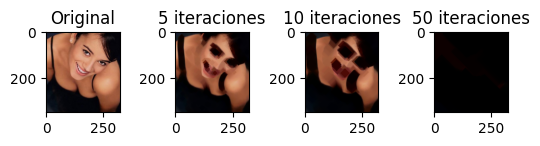

In [30]:
kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
erosion1=cv2.erode(interiorRGB,kernel,iterations=5)
erosion2=cv2.erode(interiorRGB,kernel,iterations=10)
erosion3=cv2.erode(interiorRGB,kernel,iterations=50)

plt.subplot(441), plt.imshow(interiorRGB), plt.title('Original')
plt.subplot(442), plt.imshow(erosion1), plt.title('5 iteraciones')
plt.subplot(443), plt.imshow(erosion2), plt.title('10 iteraciones')
plt.subplot(444), plt.imshow(erosion3), plt.title('50 iteraciones')

Cuando se emplean pocas iteraciones no se evidencian diferencias significativas con el kernel empleado. A medida que el número de iteraciones aumenta, los efectos de cambio de kernel se hacen más notorias.

### Dilatación

(<Axes: title={'center': '50 iteraciones'}>,
 Text(0.5, 1.0, '50 iteraciones'))

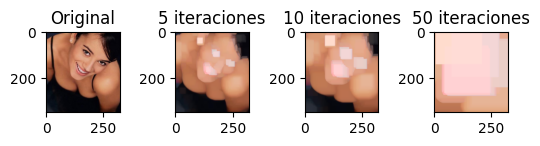

In [31]:
kernel=np.ones((5,5),np.uint8)
dilatacion1=cv2.dilate(interiorRGB,kernel,iterations=5)
dilatacion2=cv2.dilate(interiorRGB,kernel,iterations=10)
dilatacion3=cv2.dilate(interiorRGB,kernel,iterations=50)

plt.subplot(441), plt.imshow(interiorRGB), plt.title('Original')
plt.subplot(442), plt.imshow(dilatacion1), plt.title('5 iteraciones')
plt.subplot(443), plt.imshow(dilatacion2), plt.title('10 iteraciones')
plt.subplot(444), plt.imshow(dilatacion3), plt.title('50 iteraciones')

Kernel Elipse

(<Axes: title={'center': '50 iteraciones'}>,
 Text(0.5, 1.0, '50 iteraciones'))

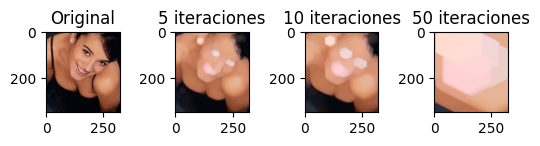

In [32]:
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dilatacion1=cv2.dilate(interiorRGB,kernel,iterations=5)
dilatacion2=cv2.dilate(interiorRGB,kernel,iterations=10)
dilatacion3=cv2.dilate(interiorRGB,kernel,iterations=50)

plt.subplot(441), plt.imshow(interiorRGB), plt.title('Original')
plt.subplot(442), plt.imshow(dilatacion1), plt.title('5 iteraciones')
plt.subplot(443), plt.imshow(dilatacion2), plt.title('10 iteraciones')
plt.subplot(444), plt.imshow(dilatacion3), plt.title('50 iteraciones')

Kernel Cruz

(<Axes: title={'center': '50 iteraciones'}>,
 Text(0.5, 1.0, '50 iteraciones'))

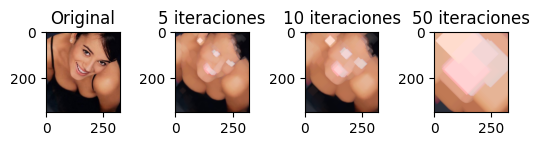

In [33]:
kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
dilatacion1=cv2.dilate(interiorRGB,kernel,iterations=5)
dilatacion2=cv2.dilate(interiorRGB,kernel,iterations=10)
dilatacion3=cv2.dilate(interiorRGB,kernel,iterations=50)

plt.subplot(441), plt.imshow(interiorRGB), plt.title('Original')
plt.subplot(442), plt.imshow(dilatacion1), plt.title('5 iteraciones')
plt.subplot(443), plt.imshow(dilatacion2), plt.title('10 iteraciones')
plt.subplot(444), plt.imshow(dilatacion3), plt.title('50 iteraciones')

En la erosión sucede algo similar a la dilatación. Cuando se emplean pocas iteraciones no se evidencian diferencias significativas con el kernel empleado. A medida que el número de iteraciones aumenta, los efectos de cambio de kernel se hacen más notorias.

### Operaciones complejas
Con kernel Elipse

(<Axes: title={'center': 'BlackHat'}>,
 Text(0.5, 1.0, 'BlackHat'))

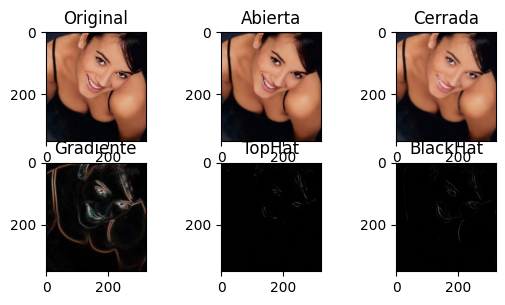

In [34]:
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
abierta=cv2.morphologyEx(interiorRGB,cv2.MORPH_OPEN,kernel)
cerrada=cv2.morphologyEx(interiorRGB,cv2.MORPH_CLOSE,kernel)
gradiente=cv2.morphologyEx(interiorRGB,cv2.MORPH_GRADIENT,kernel)
tophat=cv2.morphologyEx(interiorRGB,cv2.MORPH_TOPHAT,kernel)
blackhat=cv2.morphologyEx(interiorRGB,cv2.MORPH_BLACKHAT,kernel)
plt.subplot(331), plt.imshow(interiorRGB), plt.title('Original')
plt.subplot(332), plt.imshow(abierta), plt.title('Abierta')
plt.subplot(333), plt.imshow(cerrada), plt.title('Cerrada')
plt.subplot(334), plt.imshow(gradiente), plt.title('Gradiente')
plt.subplot(335), plt.imshow(tophat), plt.title('TopHat')
plt.subplot(336), plt.imshow(blackhat), plt.title('BlackHat')

Kernel cruz

(<Axes: title={'center': 'BlackHat'}>,
 Text(0.5, 1.0, 'BlackHat'))

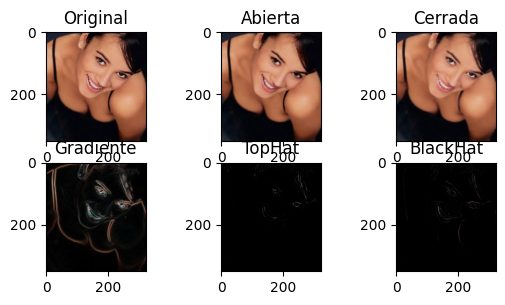

In [35]:
kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
abierta=cv2.morphologyEx(interiorRGB,cv2.MORPH_OPEN,kernel)
cerrada=cv2.morphologyEx(interiorRGB,cv2.MORPH_CLOSE,kernel)
gradiente=cv2.morphologyEx(interiorRGB,cv2.MORPH_GRADIENT,kernel)
tophat=cv2.morphologyEx(interiorRGB,cv2.MORPH_TOPHAT,kernel)
blackhat=cv2.morphologyEx(interiorRGB,cv2.MORPH_BLACKHAT,kernel)
plt.subplot(331), plt.imshow(interiorRGB), plt.title('Original')
plt.subplot(332), plt.imshow(abierta), plt.title('Abierta')
plt.subplot(333), plt.imshow(cerrada), plt.title('Cerrada')
plt.subplot(334), plt.imshow(gradiente), plt.title('Gradiente')
plt.subplot(335), plt.imshow(tophat), plt.title('TopHat')
plt.subplot(336), plt.imshow(blackhat), plt.title('BlackHat')

Como en los casos anteriores de dilatación y erosión cuando se emplean pocas iteraciones no se evidencian diferencias significativas con el kernel empleado. A medida que el número de iteraciones aumenta, los efectos de cambio de kernel se hacen más notorias.